# Problem statement 1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing



In [2]:
df=pd.read_csv("Company_Data.csv")

In [3]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [4]:
label_encoder = preprocessing.LabelEncoder()
df['ShelveLoc']= label_encoder.fit_transform(df['ShelveLoc']) 
df['Urban']= label_encoder.fit_transform(df['Urban'])
df['US']= label_encoder.fit_transform(df['US'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
Sales          400 non-null float64
CompPrice      400 non-null int64
Income         400 non-null int64
Advertising    400 non-null int64
Population     400 non-null int64
Price          400 non-null int64
ShelveLoc      400 non-null int32
Age            400 non-null int64
Education      400 non-null int64
Urban          400 non-null int32
US             400 non-null int32
dtypes: float64(1), int32(3), int64(7)
memory usage: 29.8 KB


In [6]:
df
array=df.values

In [7]:
array

array([[  9.5 , 138.  ,  73.  , ...,  17.  ,   1.  ,   1.  ],
       [ 11.22, 111.  ,  48.  , ...,  10.  ,   1.  ,   1.  ],
       [ 10.06, 113.  ,  35.  , ...,  12.  ,   1.  ,   1.  ],
       ...,
       [  7.41, 162.  ,  26.  , ...,  18.  ,   1.  ,   1.  ],
       [  5.94, 100.  ,  79.  , ...,  12.  ,   1.  ,   1.  ],
       [  9.71, 134.  ,  37.  , ...,  16.  ,   1.  ,   1.  ]])

In [8]:
x=array[:,0:9]
y=array[:,9:]

In [9]:
x

array([[  9.5 , 138.  ,  73.  , ...,   0.  ,  42.  ,  17.  ],
       [ 11.22, 111.  ,  48.  , ...,   1.  ,  65.  ,  10.  ],
       [ 10.06, 113.  ,  35.  , ...,   2.  ,  59.  ,  12.  ],
       ...,
       [  7.41, 162.  ,  26.  , ...,   2.  ,  40.  ,  18.  ],
       [  5.94, 100.  ,  79.  , ...,   0.  ,  50.  ,  12.  ],
       [  9.71, 134.  ,  37.  , ...,   1.  ,  49.  ,  16.  ]])

In [33]:
y

array([ 9.5 , 11.22, 10.06,  7.4 ,  4.15, 10.81,  6.63, 11.85,  6.54,
        4.69,  9.01, 11.96,  3.98, 10.96, 11.17,  8.71,  7.58, 12.29,
       13.91,  8.73,  6.41, 12.13,  5.08,  5.87, 10.14, 14.9 ,  8.33,
        5.27,  2.99,  7.81, 13.55,  8.25,  6.2 ,  8.77,  2.67, 11.07,
        8.89,  4.95,  6.59,  3.24,  2.07,  7.96, 10.43,  4.12,  4.16,
        4.56, 12.44,  4.38,  3.91, 10.61,  1.42,  4.42,  7.91,  6.92,
        4.9 ,  6.85, 11.91,  0.91,  5.42,  5.21,  8.32,  7.32,  1.82,
        8.47,  7.8 ,  4.9 ,  8.85,  9.01, 13.39,  7.99,  9.46,  6.5 ,
        5.52, 12.61,  6.2 ,  8.55, 10.64,  7.7 ,  4.43,  9.14,  8.01,
        7.52, 11.62,  4.42,  2.23,  8.47,  8.7 , 11.7 ,  6.56,  7.95,
        5.33,  4.81,  4.53,  8.86,  8.39,  5.58,  9.48,  7.45, 12.49,
        4.88,  4.11,  6.2 ,  5.3 ,  5.07,  4.62,  5.55,  0.16,  8.55,
        3.47,  8.98,  9.  ,  6.62,  6.67,  6.01,  9.31,  8.54,  5.08,
        8.8 ,  7.57,  7.37,  6.87, 11.67,  6.88,  8.19,  8.87,  9.34,
       11.27,  6.52,

In [10]:
df.Urban.value_counts()

1    282
0    118
Name: Urban, dtype: int64

In [11]:
colname=list(df.columns)

In [12]:
colname

['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban',
 'US']

In [13]:
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.33,random_state=150)

In [14]:
model = DecisionTreeClassifier(criterion = 'gini',max_depth=3)

model.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

tree.plot_tree(model)
import warnings
warnings.filterwarnings("ignore")


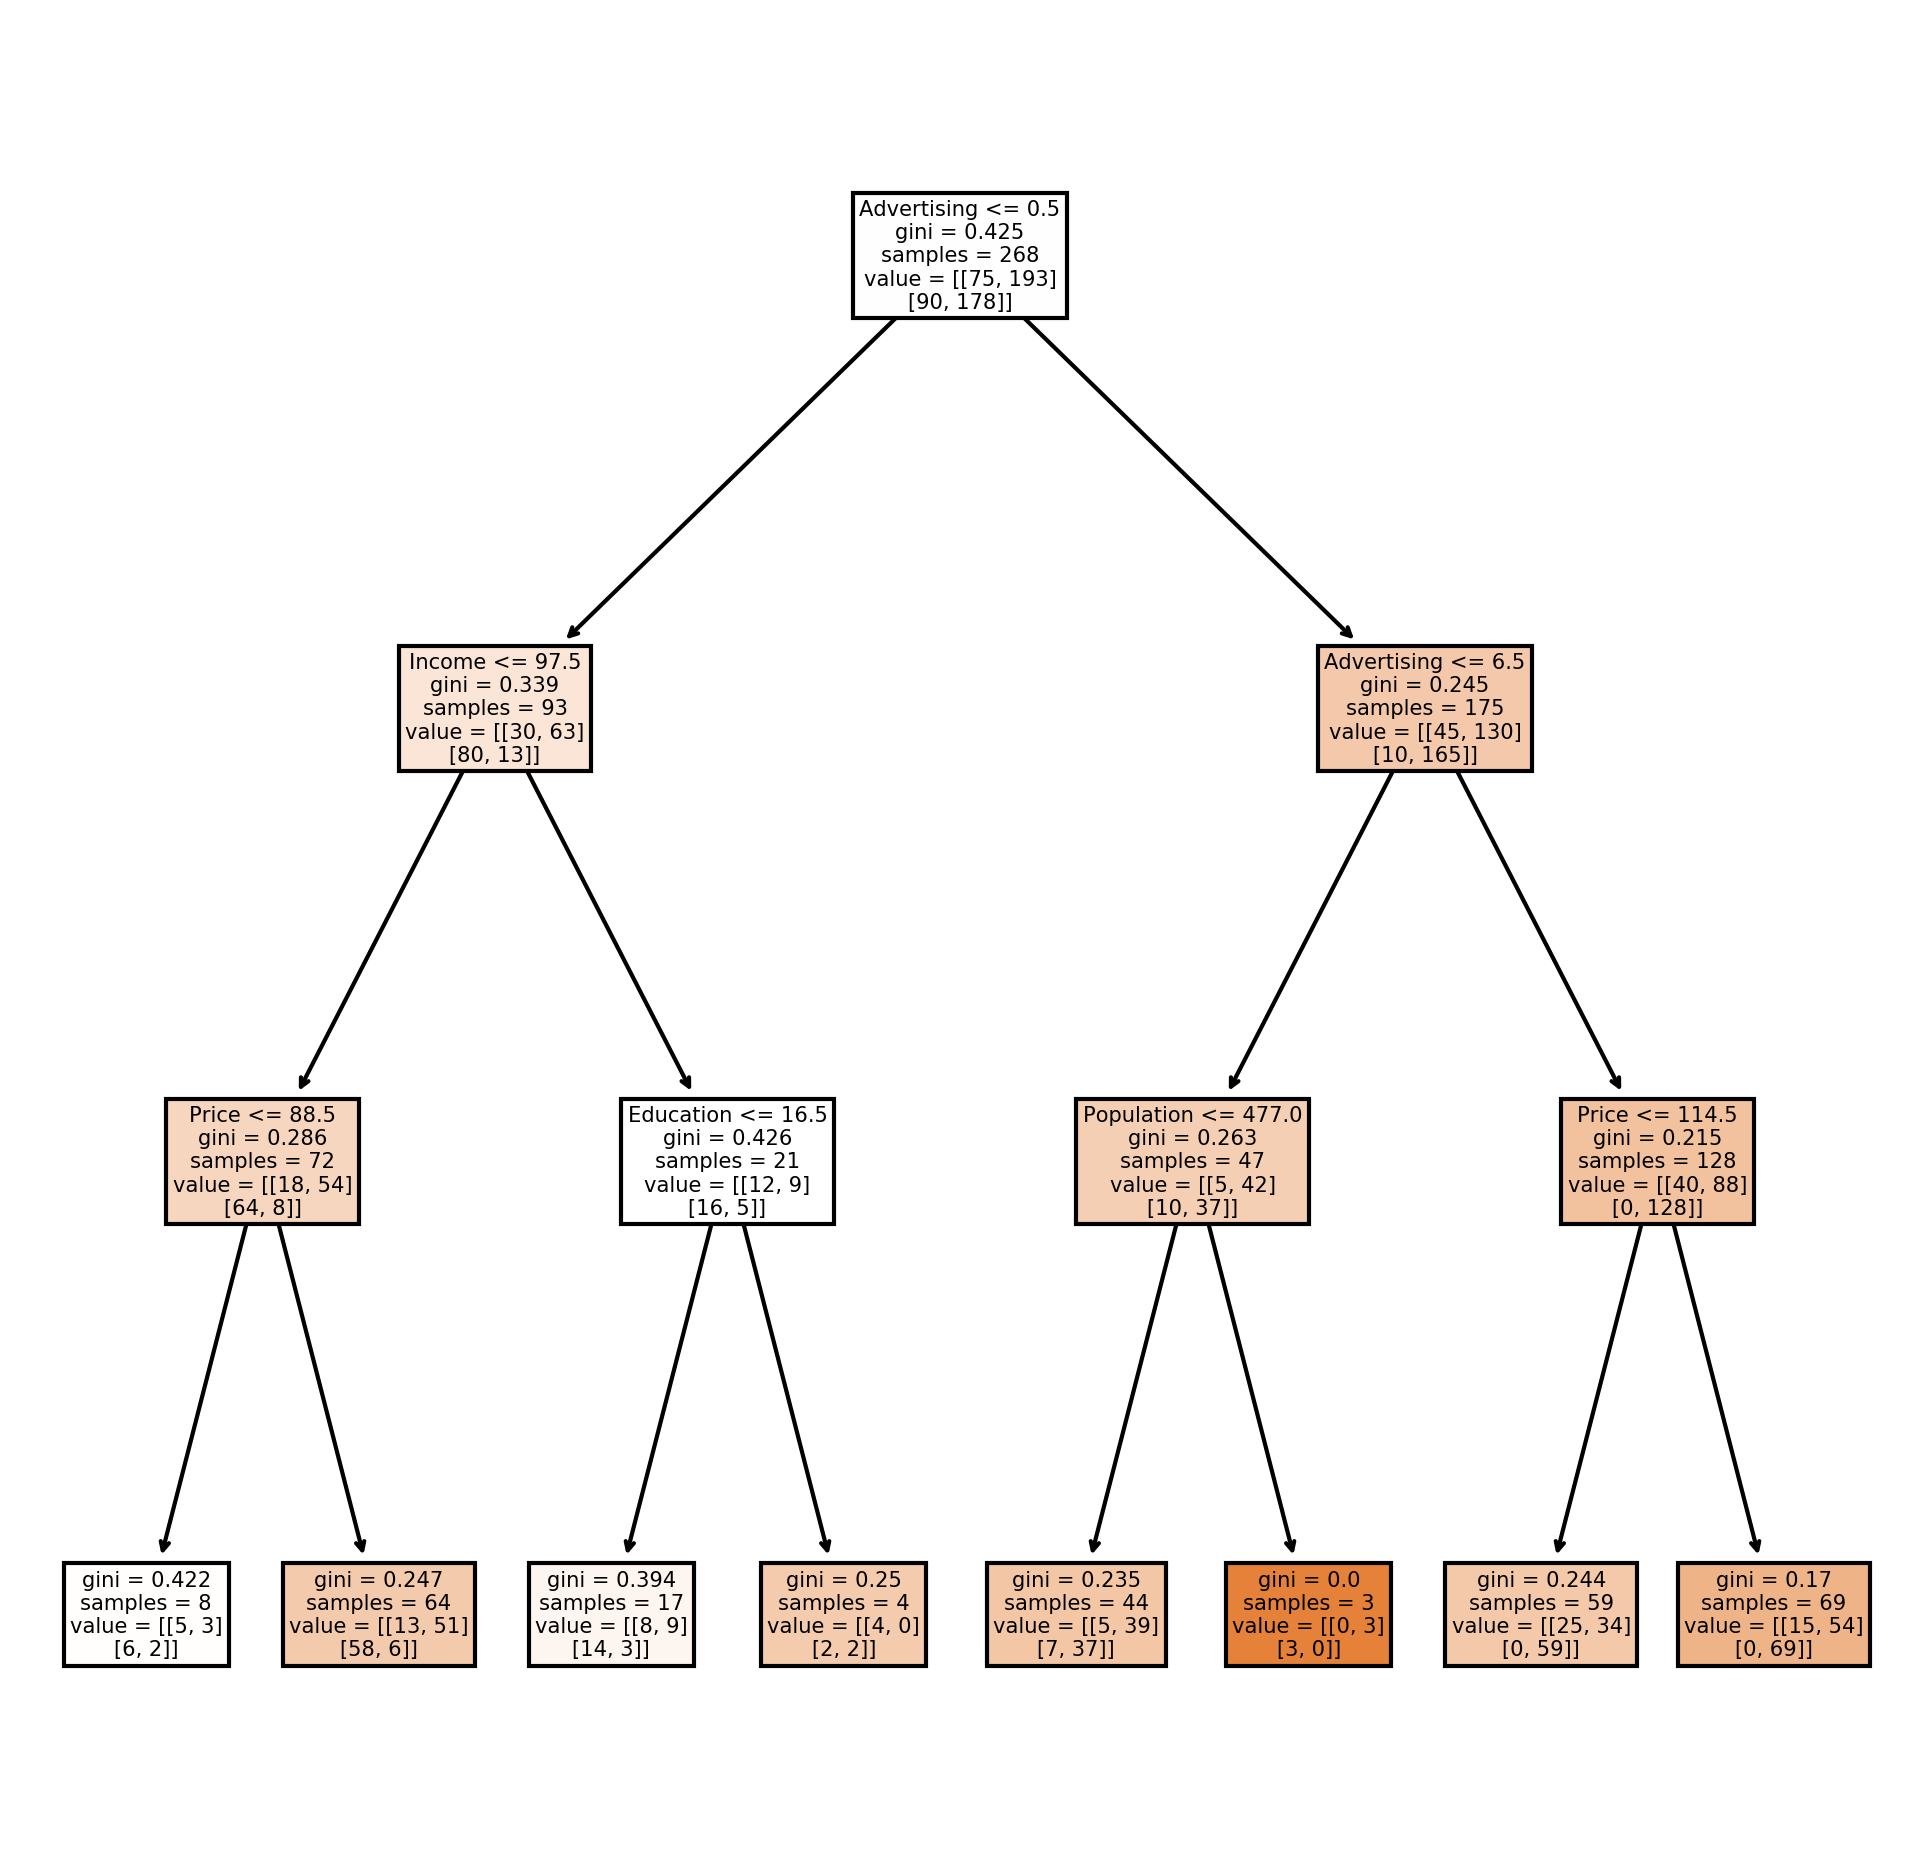

In [24]:
fn=['sales','CompPrice','Income','Advertising','Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban',
 'US']
cn=['yes', 'no']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (8,8), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [25]:
model.score(x_test,y_test)

0.553030303030303

# Problem statement 2

In [15]:
df1=pd.read_csv("Fraud_check.csv")

In [16]:
df1

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [17]:
df1['Urban']= label_encoder.fit_transform(df1['Urban'])
df1['Undergrad']= label_encoder.fit_transform(df1['Undergrad'])
df1['Marital.Status']= label_encoder.fit_transform(df1['Marital.Status'])

In [18]:
df2=df1.values

In [19]:
X=df2[:,0:5]
Y=df2[:,5:]

In [20]:
X1 = scale(X)

NameError: name 'scale' is not defined

In [21]:
Y1=scale(Y)

NameError: name 'scale' is not defined

In [22]:
from sklearn.tree import DecisionTreeRegressor
X_train, X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.33,random_state=1)

In [23]:
model = DecisionTreeClassifier(criterion = 'gini',max_depth=3)
model.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [24]:
colname=list(df1.columns)

In [25]:
colname

['Undergrad',
 'Marital.Status',
 'Taxable.Income',
 'City.Population',
 'Work.Experience',
 'Urban']

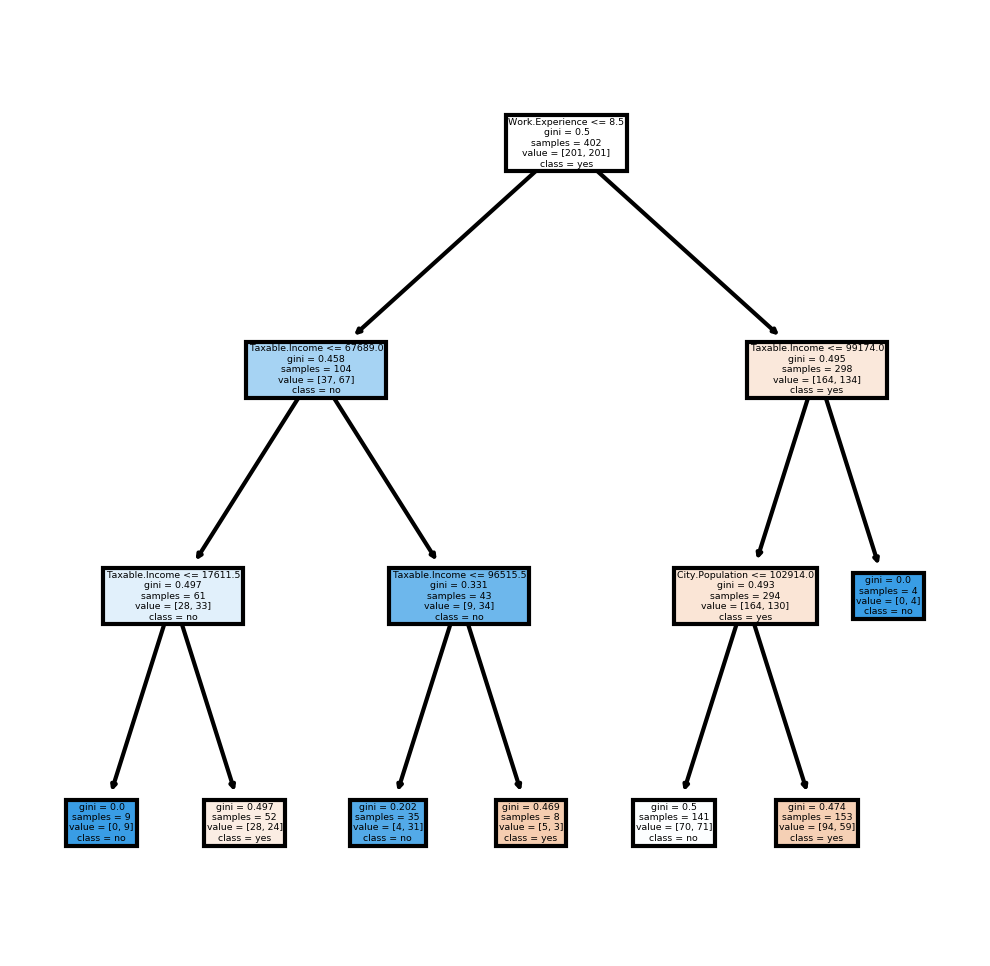

In [26]:
fn=['Undergrad',
 'Marital.Status',
 'Taxable.Income',
 'City.Population',
 'Work.Experience',
 'Urban']
cn=['yes','no']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [440]:
model.score(X_test,Y_test)

0.5404040404040404